저번에는 다중 선형회귀의 원리와 구현을 해보았습니다.

다중선형회귀가 충분히 강력한 알고리즘인건 알았지만  

조그만한 문제가 하나 있다면 클래스가 선형적으로 구분되지 않을 때  

수렴할 수 없다는 점 입니다. 에포크마다 적어도 하나의 샘플은 잘못 분류되기에 가중치 업데이트가 끝나지 않기 때문이죠.  

이를 해결하기 위해 이번엔 선형 이진 분류에 조금 더 강력한 알고리즘인 로지스틱 회귀에 대해 분석하고 구현 해보겠습니다.  

로지스틱 회귀는 회귀라는 이름을 가지고 있지만 사실상 분류 알고리즘에 가깝습니다.  

로지스틱 회귀에도 선형회귀처럼 중요한 개념이 몇가지가 등장합니다.  
그중 첫번째는 바로 오즈비(odd ratio) 인데요, 오즈는 특정 이벤트가 발생할 확률입니다.
${ \frac{P}{1-P}}$ 로 쓸 수 있고 P는 양성 샘플의 확률입니다. 예를들어 어떤 환자가 암에 걸려있을 확률 같은 것이죠.  
이 오즈비 에다가 로그를 취해 로짓함수(logit function)를 정의할 수 있습니다.  
${ logit(P) = log \frac{P}{1-P}}$  
여기서 log는 자연로그입니다. 

수식을 보면 알겠지만 위 함수는 0에서 1 사이의 값을 받아 실수범위를 출력하는데요  
특성의 가중치의(weight) 합, 로그 오즈 사이의 선형 관계를 쓰면 위와 같습니다.
$P(Y=1|X)=w0x0+w1x1+w2x2+...+wpxp = w^Tx $  
 짜잔, 또다시 행렬이 나왔네요!  
$P(Y=1|X)$ 는 특성 x가 주어졌을때 이 샘플이 1에 속할 확률을 뜻합니다.  
저희가 해야하는건 어떤 샘플이 특정 클래스에 속할 확률을 예측하는 것이 목표이니 이걸 그대로 뒤집어 봅시다.
 
 ${\phi}(z)= \frac{1}{1+e^{-z}} $ 짜잔 로지스틱 시그모이드 함수가 완성 됐습니다.  
 로지스틱 시그모이드 함수의 자세한 유도과정은 위키피디아에서 볼 수 있습니다.  
 그럼 이제 시그모이드가 어떤 모양인지 그림을 그려봅시다.  

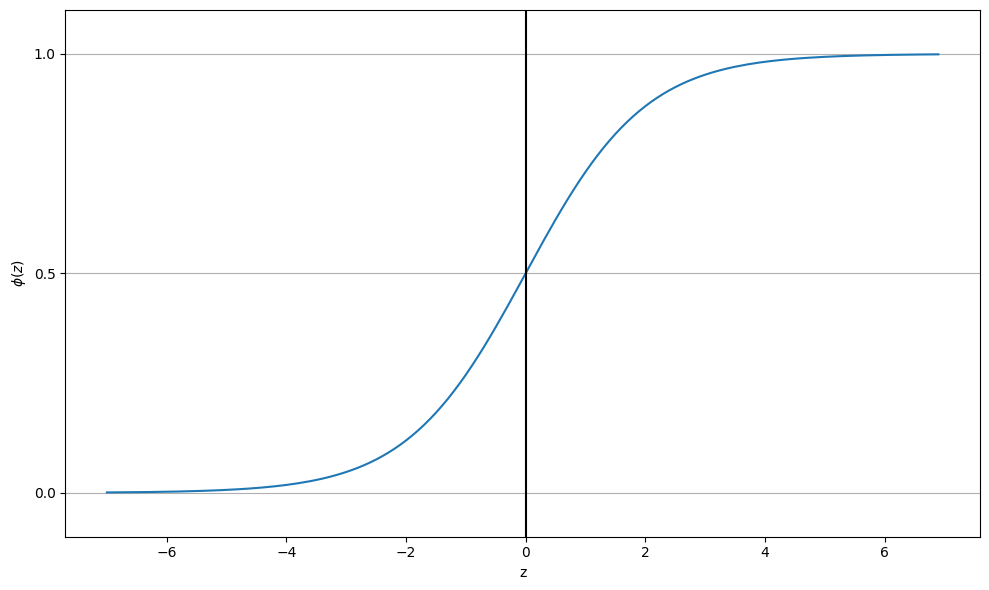

In [69]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y 축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('images/03_02.png', dpi=300)
plt.show()

In [70]:
from IPython.display import Image
Image(url='https://git.io/Jtm22', width=500) 


로지스틱 회귀도 선형함수와 같이 비용함수와 가중치 학습을 진행하는데요,   
![title](https://raw.githubusercontent.com/satishgunjal/Images/master/Cost_Function_Formula.png) 

$h(x^{(i)})가 {\phi}(z^{(i)})$ 가 됐을 뿐 근본적으로 같습니다.

In [71]:
import numpy as np
 
class LogisticRegression:
    def __init__(self,x,y):      
        self.intercept = np.ones((x.shape[0], 1))  
        self.x = np.concatenate((self.intercept, x), axis=1)
        self.weight = np.zeros(self.x.shape[1])
        self.y = y
         
    #Sigmoid method
    def sigmoid(self, x, weight):
        z = np.dot(x, weight)
        return 1 / (1 + np.exp(-z))
     
    #method to calculate the Loss
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
     
    #Method for calculating the gradients
    def gradient_descent(self, X, h, y):
        return np.dot(X.T, (h - y)) / y.shape[0]
 
     
    def fit(self, lr , iterations):
        for i in range(iterations):
            sigma = self.sigmoid(self.x, self.weight)
             
            loss = self.loss(sigma,self.y)
 
            dW = self.gradient_descent(self.x , sigma, self.y)
             
            #Updating the weights
            self.weight -= lr * dW
 
        return print('fitted successfully to data')
     
    #Method to predict the class label.
    def predict(self, x_new , treshold):
        x_new = np.concatenate((self.intercept, x_new), axis=1)
        result = self.sigmoid(x_new, self.weight)
        result = result >= treshold
        y_pred = np.zeros(result.shape[0])
        for i in range(len(y_pred)):
            if result[i] == True: 
                y_pred[i] = 1
            else:
                continue
                 
        return y_pred

선형 회귀에 대한 가설 함수는 다음과 같습니다.
  h(x) = θ_0 + (θ_1*x_1)....(θ_n*x_n)
이 함수를 Sigmoid 함수에 대한 입력으로 사용하여 이산 값을 얻을 것입니다.
  z = θ_0 + (θ_1*x_1)....(θ_n*x_n)
로지스틱 회귀에 대한 가설 함수는 다음과 같습니다.
  h(x) = g(z) = g(θ_0 + (θ_1*x_1)....(θ_n*x_n))

기본적으로 우리는 0에서 1까지의 이산 값을 얻기 위해 시그모이드 함수에 대한 입력으로 선 함수를 사용하고 있습니다. 시그모이드 함수 g(z)가 동작하는 방식은 입력이 0보다 크거나 같을 때 출력이 더 큽니다. 0.5 이상
양수 입력은 양수 클래스를 생성하고 음수 입력은 음수 클래스를 생성하므로 입력의 가중치 합을 0으로 설정하여 두 클래스를 모두 분리할 수 있습니다.
결정 경계는 긍정적인 클래스와 부정적인 클래스를 구분합니다.
결정 경계는 y = 0인 영역과 y = 1인 영역을 구분하는 선입니다. 이것은 우리의 가설 함수에 의해 생성됩니다.
앞에서 설명한 것처럼 입력의 가중치 합을 0으로 설정하여 결정 경계를 찾을 수 있습니다.
두 기능(x 및 x1) 데이터 세트에 대한 결정 경계를 찾는 공식을 만들 수 있습니다.

  h(x) = θ_0 + (θ_1*x_1) + (θ_2*x_2) = 0
  x_2 = -(θ_0 + (θ_1*x_1)) / θ_2

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [85]:
red_wine = pd.read_csv('../winequality-red.csv', sep=';')
white_wine = pd.read_csv('../winequality-white.csv',sep=';')
#칼럼 추가
red_wine['color'] = 1 #red
white_wine['color'] = 0 #white

df = pd.concat([red_wine, white_wine])
m, n = df.shape
print('Number of training examples m = ', m)
print('Number of features n = ', n - 1) # Not counting the 'Label: Admission status'
df.sample(5) # Show random 5 training examples

Number of training examples m =  6497
Number of features n =  12


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
3847,6.4,0.320,0.23,16.2,0.055,36.0,176.0,0.99860,3.26,0.54,9.1,5,0
1308,9.2,0.150,0.68,1.6,0.046,22.0,130.0,0.99480,3.02,0.45,10.4,6,0
1076,9.9,0.320,0.56,2.0,0.073,3.0,8.0,0.99534,3.15,0.73,11.4,6,1
1564,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,1
1920,8.1,0.260,0.33,11.1,0.052,52.5,158.0,0.99760,3.03,0.49,10.2,7,0


In [88]:
df_red = df[df['color']==1]
print(df.shape)
print('Dimension of df_admitted= ', df_red.shape)
df_red.sample(5)

(6497, 13)
Dimension of df_admitted=  (1599, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
1516,6.1,0.32,0.25,2.30,0.071,23.0,58.0,0.99633,3.42,0.97,10.6,5,1
1002,9.1,0.29,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7,1
714,9.9,0.74,0.28,2.60,0.078,21.0,77.0,0.99800,3.28,0.51,9.8,5,1
10,6.7,0.58,0.08,1.80,0.097,15.0,65.0,0.99590,3.28,0.54,9.2,5,1
574,10.6,0.34,0.49,3.20,0.078,20.0,78.0,0.99920,3.19,0.70,10.0,6,1


Text(0.5, 1.0, 'Admitted Vs Not Admitted Applicants')

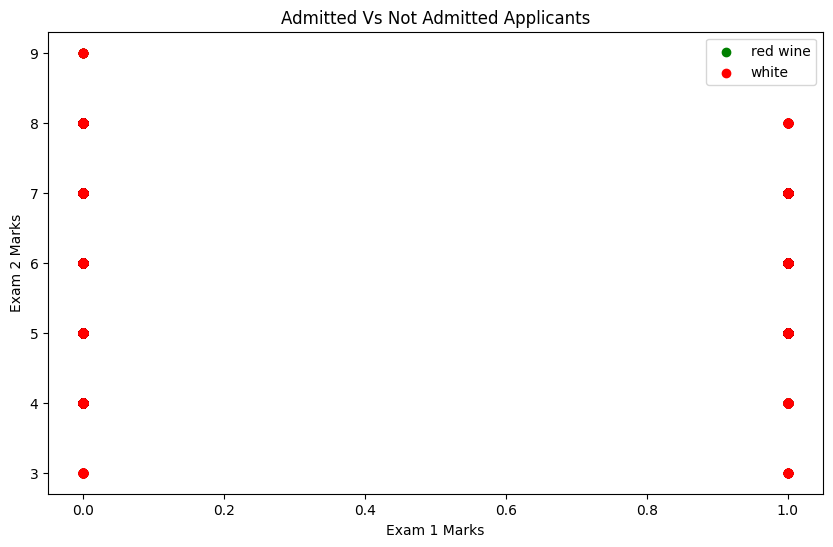

In [91]:
plt.figure(figsize = (10,6))
plt.scatter(df['color'], df['quality'], color='green', label='red wine')
plt.scatter(df['color'], df['quality'], color='red', label='white')
plt.xlabel('Exam 1 Marks')
plt.ylabel('Exam 2 Marks')
plt.legend()
plt.title('Admitted Vs Not Admitted Applicants')

In [93]:
df_notadmitted = df[df['color'] == 0]
print('Dimension of df_notadmitted= ', df_notadmitted.shape)
df_notadmitted.sample(5)

Dimension of df_notadmitted=  (4898, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4395,6.6,0.24,0.22,12.3,0.051,35.0,146.0,0.99676,3.10,0.67,9.4,5,0
4626,6.3,0.30,0.91,8.2,0.034,50.0,199.0,0.99394,3.39,0.49,11.7,6,0
47,6.2,0.46,0.25,4.4,0.066,62.0,207.0,0.99390,3.25,0.52,9.8,5,0
1103,7.9,0.29,0.39,6.7,0.036,6.0,117.0,0.99380,3.12,0.42,10.7,5,0
1343,6.6,0.25,0.31,12.4,0.059,52.0,181.0,0.99840,3.51,0.47,9.8,6,0


In [123]:
X = df.iloc[:, 0:2] 
#Add column of ones (intercept term)
X = np.hstack((np.ones((m,1)),X))
# Now X is numpy array of 2 dimension
print("Dimension of feature matric X = ", X.shape, '\n')

y = df.tail()
# First 5 records training examples with labels

print('x =', X[1, ], ', y =', y[1])
print(X[:5])
print(y[:5])

Dimension of feature matric X =  (6497, 3) 



KeyError: 1

In [ ]:
#시그모이드 함수 생성

def sigmoid(z):
    """
    To convert continuous value into a range of 0 to 1

    I/P
    ----------
    z : Continuous value

    O/P
    -------
    Value in range between 0 to 1.
    """
    g = 1 / (1 + np.exp(-z))
    return g

In [ ]:
theta = np.zeros(n)
theta

array([0., 0., 0.])

In [ ]:
#비용 및 기울기 함수 생성
def cost_function(theta, X, y):
    """
    Compute cost for logistic regression.

    I/P
    ----------
    X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
        m= number of training examples
        n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each traing example. dimension(1 x m)

    theta : 1D array of fitting parameters or weights. Dimension (1 x n)

    O/P
    -------
    J : The cost of using theta as the parameter for linear regression to fit the data points in X and y.
    """
    m, n = X.shape
    x_dot_theta = X.dot(theta)

    J = 1.0 / m * (-y.T.dot(np.log(sigmoid(x_dot_theta))) - (1 - y).T.dot(np.log(1 - sigmoid(x_dot_theta))))

    return J

In [ ]:
def gradient(theta, X, y):
    """
    Compute gradient for logistic regression.

    I/P
    ----------
    X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
        m= number of training examples
        n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each traing example. dimension(1 x m)

    theta : 1D array of fitting parameters or weights. Dimension (1 x n)

    O/P
    -------
    grad: (numpy array)The gradient of the cost with respect to the parameters theta
    """
    m, n = X.shape
    x_dot_theta = X.dot(theta)

    grad = 1.0 / m * (sigmoid(x_dot_theta) - y).T.dot(X)

    return grad

In [ ]:
cost = cost_function(theta, X, y)
print ('Cost at initial theta (zeros):', cost)

grad = gradient(theta, X, y)
print ('Gradient at initial theta (zeros):', grad)

Cost at initial theta (zeros): 0.6931471805599453
Gradient at initial theta (zeros): [ -0.1        -12.00921659 -11.26284221]


In [ ]:
#고급 최적화 기술을 사용하여 세타 값 찾기

theta, nfeval, rc = opt.fmin_tnc(func=cost_function, fprime= gradient, x0=theta, args=(X, y))

cost = cost_function(theta, X, y)
print ('Cost at theta found by fminunc:', cost)
print ('theta:', theta)

Cost at theta found by fminunc: 0.20349770158947497
theta: [-25.16131854   0.20623159   0.20147149]


Text(0.5, 1.0, 'Decision Boundary')

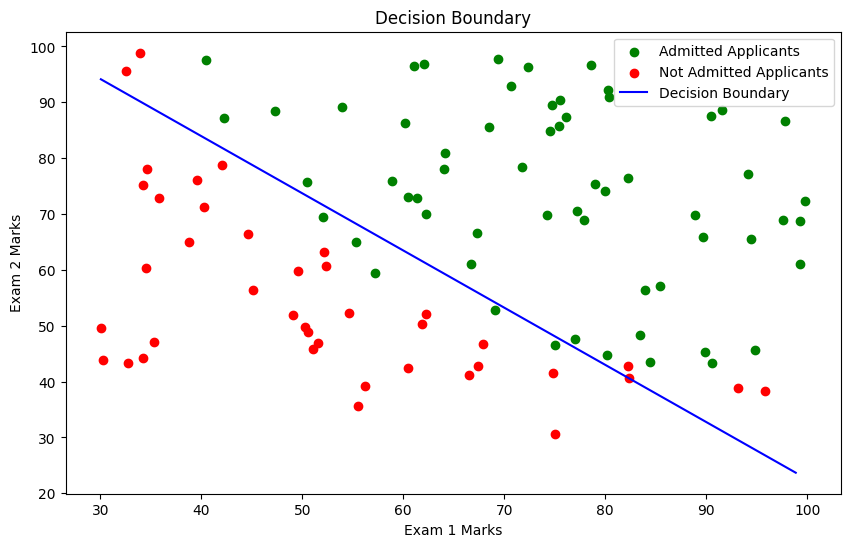

In [ ]:
# Lets calculate the X and Y values using Decision Boundary formula

# For ploting a line we just need 2 points. Here I am taking 'min' and 'max' value as my two X points
x_values = [min(X[:, 1]), np.max(X[:, 2])]
y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]

plt.figure(figsize = (10,6))
plt.scatter(df_admitted['Exam 1 marks'], df_admitted['Exam 2 marks'], color='green', label='Admitted Applicants')
plt.scatter(df_notadmitted['Exam 1 marks'], df_notadmitted['Exam 2 marks'], color='red', label='Not Admitted Applicants')
plt.xlabel('Exam 1 Marks')
plt.ylabel('Exam 2 Marks')

plt.plot(x_values, y_values, color='blue', label='Decision Boundary')
plt.legend()
plt.title('Decision Boundary')

In [ ]:
input_data = np.array([1, 45, 85]) # Note the intercept term '1' in array
prob = sigmoid(np.dot(input_data, theta))
print ('Admission probability for applicant with scores 45 in Exam 1 and 85 in Exam 2 is =', prob)

Admission probability for applicant with scores 45 in Exam 1 and 85 in Exam 2 is = 0.7762906224352402


로지스틱 모델에 대한 예측을 위한 함수를 만들어 보겠습니다. 이 함수는 0과 1 사이의 확률을 예측하는 대신 0.5의 임계값을 사용하여 이산 값을 예측합니다. 확률 >= 0.5일 때 1 그렇지 않으면 0

In [ ]:
def predict(theta, X):
    """
    Predict the class between 0 and 1 using learned logistic regression parameters theta.
    Using threshold value 0.5 to convert probability value to class value 

    I/P
    ----------
    X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
        m= number of training examples
        n= number of features (including X_0 column of ones)

    theta : 1D array of fitting parameters or weights. Dimension (1 x n)

    O/P
    -------
    Class type based on threshold
    """
    p = sigmoid(X.dot(theta)) >= 0.5
    return p.astype(int)

In [ ]:
#모델의 정확도
predictedValue = pd.DataFrame(predict(theta, X), columns=['Predicted Admission status']) # Create new dataframe of column'Predicted Price'
actualAdmissionStatus = pd.DataFrame(y, columns=['Admission status'])
df_actual_vs_predicted = pd.concat([actualAdmissionStatus,predictedValue],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Admission status,0,0,0,1,1,0,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
Predicted Admission status,0,0,0,1,1,0,1,0,1,1,...,1,1,0,1,1,1,1,1,0,1


In [ ]:
p = predict(theta, X)
print ('Accuracy:', np.mean(p == y) * 100 )

Accuracy: 89.0
